# TOPSIS Assignment – UCS654

**Technique for Order of Preference by Similarity to Ideal Solution (TOPSIS)**

---

### Student Details
- **Name:** Keshav Sharma  
- **Roll No:** 102303520  
- **Course:** UCS654  
- **Assignment:** TOPSIS  

---

This notebook demonstrates the step-by-step implementation of the TOPSIS method using Python.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()


Saving input.csv to input.csv


In [3]:
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df


,Name,Cost,Quality,Durability
0,A,250,16,12
1,B,200,18,2
2,C,300,32,6


In [4]:
# Define weights and impacts
weights = np.array([1, 1, 1])
impacts = ['-', '+', '+']  # '-' for cost, '+' for benefit

print("Weights:", weights)
print("Impacts:", impacts)


Weights: [1 1 1]
Impacts: ['-', '+', '+']


In [5]:
data = df.iloc[:, 1:].values
norm_matrix = data / np.sqrt((data ** 2).sum(axis=0))
norm_matrix


array([[0.56980288, 0.39950094, 0.88465174],
       [0.45584231, 0.44943855, 0.14744196],
       [0.68376346, 0.79900187, 0.44232587]])

In [6]:
weighted_matrix = norm_matrix * weights
weighted_matrix


array([[0.56980288, 0.39950094, 0.88465174],
       [0.45584231, 0.44943855, 0.14744196],
       [0.68376346, 0.79900187, 0.44232587]])

In [7]:
ideal_best = []
ideal_worst = []

for i in range(len(impacts)):
    if impacts[i] == '+':
        ideal_best.append(max(weighted_matrix[:, i]))
        ideal_worst.append(min(weighted_matrix[:, i]))
    else:
        ideal_best.append(min(weighted_matrix[:, i]))
        ideal_worst.append(max(weighted_matrix[:, i]))

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

ideal_best, ideal_worst


(array([0.45584231, 0.79900187, 0.88465174]),
 array([0.68376346, 0.39950094, 0.14744196]))

In [8]:
distance_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))

distance_best, distance_worst


(array([0.41543713, 0.81588772, 0.49759444]),
 array([0.745966  , 0.2333277 , 0.49654559]))

In [9]:
topsis_score = distance_worst / (distance_best + distance_worst)
topsis_score


array([0.64229722, 0.22238303, 0.49947248])

In [10]:
df['TOPSIS Score'] = topsis_score
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)

df.sort_values(by='Rank')


,Name,Cost,Quality,Durability,TOPSIS Score,Rank
0,A,250,16,12,0.642297,1.0
2,C,300,32,6,0.499472,2.0
1,B,200,18,2,0.222383,3.0


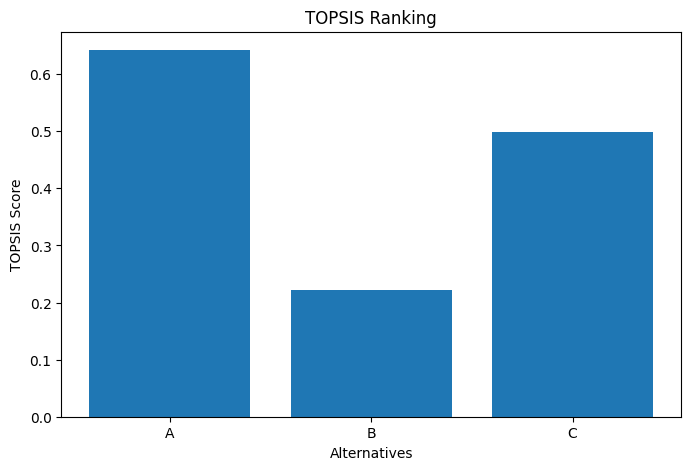

In [11]:
plt.figure(figsize=(8,5))
plt.bar(df.iloc[:,0], df['TOPSIS Score'])
plt.xlabel("Alternatives")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking")
plt.show()


## Conclusion

- TOPSIS successfully ranks alternatives based on multiple criteria.
- Higher TOPSIS score indicates better alternative.
- This method helps in rational and quantitative decision making.
